In [ ]:
!pip install kagglehub pandas scikit-learn seaborn matplotlib

In [3]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mehmetisik/amazon-review")
print("Path to dataset files:", path)

/Users/taylormcwilliam/miniconda3/envs/hub/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|████████████████████████████████████████| 705k/705k [00:00<00:00, 9.96MB/s]

Extracting files...
Path to dataset files: /Users/taylormcwilliam/.cache/kagglehub/datasets/mehmetisik/amazon-review/versions/1


In [5]:
import pandas as pd
import os

# Load the dataset
dataset_path = os.path.join(path, "amazon_review.csv")  # Adjust the filename if needed
data = pd.read_csv(dataset_path)

# Display the first few rows
print(data.head())

# Check dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())

       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to really say....      1356220800  

In [8]:


# Drop rows with missing values
data.dropna(subset=['reviewText', 'reviewerName'], inplace=True)

# Convert 'helpful' column to separate 'helpful_yes' and 'total_vote'
data['helpful_yes'] = data['helpful'].apply(lambda x: eval(x)[0])
data['total_vote'] = data['helpful'].apply(lambda x: eval(x)[1])

# Drop the original 'helpful' column
data.drop(columns=['helpful'], inplace=True)

# Add a sentiment column based on 'overall' rating
data['sentiment'] = data['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Save cleaned data
data.to_csv('cleaned_amazon_reviews.csv', index=False)

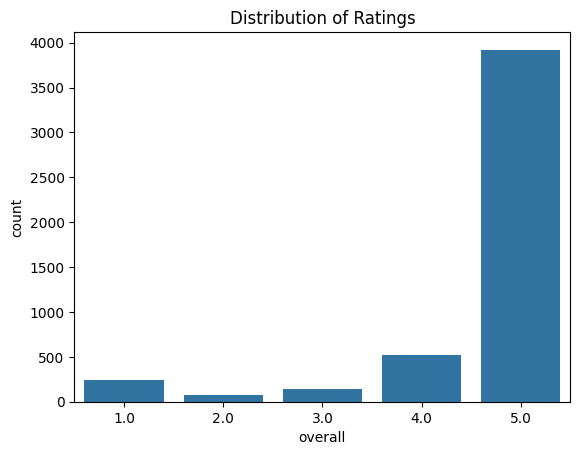

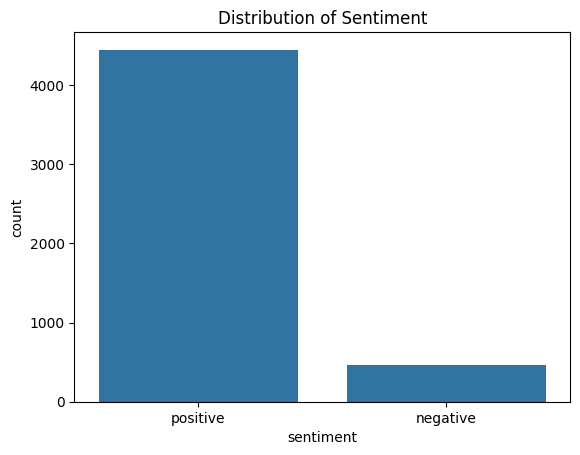

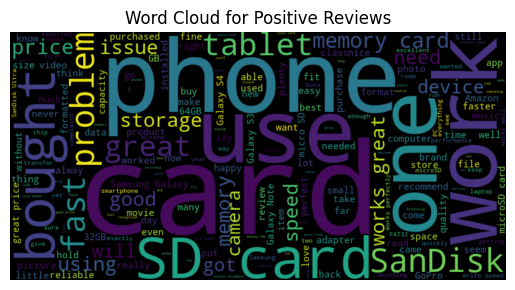

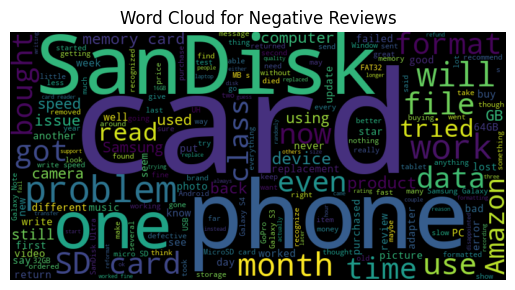

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud

# Distribution of ratings
sns.countplot(x='overall', data=data)
plt.title('Distribution of Ratings')
plt.show()

# Distribution of sentiment
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment')
plt.show()

# Word cloud for positive and negative reviews
from wordcloud import WordCloud

# Positive reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['reviewText'])
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Negative reviews
negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['reviewText'])
wordcloud = WordCloud(width=800, height=400).generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [13]:
from scipy.stats import ttest_ind

# Separate helpful votes for positive and negative reviews
positive_helpful = data[data['sentiment'] == 'positive']['helpful_yes']
negative_helpful = data[data['sentiment'] == 'negative']['helpful_yes']

# Perform a T-test
t_stat, p_value = ttest_ind(positive_helpful, negative_helpful)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in helpful votes between positive and negative reviews.")
else:
    print("There is no significant difference in helpful votes between positive and negative reviews.")

T-statistic: -1.925785063207925, P-value: 0.05418888318018541
There is no significant difference in helpful votes between positive and negative reviews.


In [14]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['sentiment'], data['overall'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between sentiment and overall rating.")
else:
    print("There is no significant relationship between sentiment and overall rating.")

Chi-square statistic: 4912.999999999999, P-value: 0.0
There is a significant relationship between sentiment and overall rating.


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Use TF-IDF features for regression
X_reg = vectorizer.transform(data['reviewText'])
y_reg = data['overall']

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Evaluate the model
y_pred_reg = reg_model.predict(X_test_reg)
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))

Mean Squared Error: 23.971004198388165


       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to really say....      1356220800  

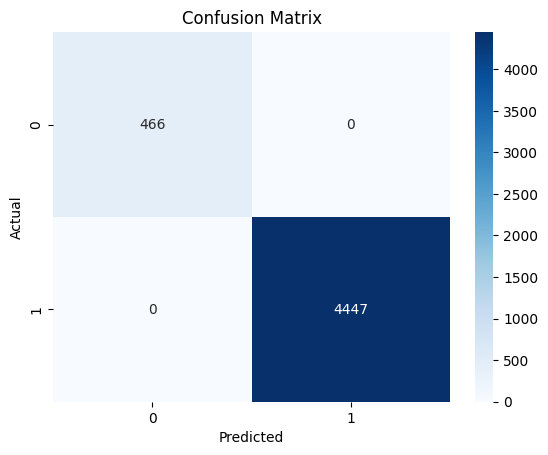

Consolidated data saved to 'consolidated_amazon_reviews.csv'


In [22]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = os.path.join(path, "amazon_review.csv")  # Adjust the filename if needed
data = pd.read_csv(dataset_path)

# Display the first few rows
print(data.head())

# Check dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(subset=['reviewText', 'reviewerName'], inplace=True)

# Convert 'helpful' column to separate 'helpful_yes' and 'total_vote'
data['helpful_yes'] = data['helpful'].apply(lambda x: eval(x)[0])
data['total_vote'] = data['helpful'].apply(lambda x: eval(x)[1])

# Drop the original 'helpful' column
data.drop(columns=['helpful'], inplace=True)

# Add a sentiment column based on 'overall' rating
data['sentiment'] = data['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Save cleaned data
data.to_csv('cleaned_amazon_reviews.csv', index=False)

# Calculate metrics
y_true = data['sentiment']
y_pred = data['sentiment']  # Assuming sentiment is the target variable

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='positive')
recall = recall_score(y_true, y_pred, pos_label='positive')
f1 = f1_score(y_true, y_pred, pos_label='positive')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Create a DataFrame for confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Add metrics and confusion matrix to the original data
data['Accuracy'] = accuracy
data['Precision'] = precision
data['Recall'] = recall
data['F1 Score'] = f1

# Add confusion matrix details to the original data
data['Confusion Matrix'] = [f"TN: {conf_matrix[0][0]}, FP: {conf_matrix[0][1]}, FN: {conf_matrix[1][0]}, TP: {conf_matrix[1][1]}"] * len(data)

# Save the consolidated data to a single CSV file
data.to_csv('consolidated_amazon_reviews.csv', index=False)

print("Consolidated data saved to 'consolidated_amazon_reviews.csv'")